<a href="https://colab.research.google.com/github/samueljos3/ProjetoHeartDisease/blob/main/Aplica%C3%A7%C3%A3o_UnderSample_ML_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APLICAÇÃO DE ALGUNS MODELOS

## Tratamento dos dados

In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/erlonL/Projeto-ICD/main/heart-disease.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [252]:
def troca_por_binario(valor_coluna):
  if valor_coluna == "Yes":
    valor_coluna = 1.0
  elif valor_coluna == "No":
    valor_coluna = 0.0
  elif valor_coluna == "No, borderline diabetes":
    valor_coluna = 0.0
  elif valor_coluna == "Yes (during pregnancy)":
    valor_coluna = 1.0
  return valor_coluna

df_numeric = df.select_dtypes(include='number')

for coluna in df.columns:
    if coluna not in df_numeric.columns:
      df[coluna] = df[coluna].apply(troca_por_binario)

In [253]:
df['GenHealthNUM'] = df['GenHealth'].replace({"Poor": 1.0, "Fair": 2.0, "Good": 3.0, "Very good": 4.0, "Excellent": 5.0})
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealthNUM
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,Female,55-59,White,1.0,1.0,Very good,5.0,1.0,0.0,1.0,4.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,Female,80 or older,White,0.0,1.0,Very good,7.0,0.0,0.0,0.0,4.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,Male,65-69,White,1.0,1.0,Fair,8.0,1.0,0.0,0.0,2.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,Female,75-79,White,0.0,0.0,Good,6.0,0.0,0.0,1.0,3.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,Female,40-44,White,0.0,1.0,Very good,8.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,Male,60-64,Hispanic,1.0,0.0,Fair,6.0,1.0,0.0,0.0,2.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,Male,35-39,Hispanic,0.0,1.0,Very good,5.0,1.0,0.0,0.0,4.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,Female,45-49,Hispanic,0.0,1.0,Good,6.0,0.0,0.0,0.0,3.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,Female,25-29,Hispanic,0.0,0.0,Good,12.0,0.0,0.0,0.0,3.0


In [254]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_transform = ohe.fit_transform(df[["Sex", "Race"]])
ohe_transform.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [255]:
df_ohe = pd.DataFrame(ohe_transform.toarray())

In [256]:
novo_dataset = pd.concat([df, df_ohe], axis = 1)
novo_dataset = novo_dataset.dropna()

In [257]:
pd.options.display.max_columns = None
novo_dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealthNUM,0,1,2,3,4,5,6,7
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,Female,55-59,White,1.0,1.0,Very good,5.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,Female,80 or older,White,0.0,1.0,Very good,7.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,Male,65-69,White,1.0,1.0,Fair,8.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,Female,75-79,White,0.0,0.0,Good,6.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,Female,40-44,White,0.0,1.0,Very good,8.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,28.87,1.0,0.0,0.0,6.0,0.0,1.0,Female,75-79,Black,0.0,0.0,Fair,12.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,21.63,0.0,0.0,0.0,15.0,0.0,0.0,Female,70-74,White,0.0,1.0,Fair,4.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,31.64,1.0,0.0,0.0,5.0,0.0,1.0,Female,80 or older,White,1.0,0.0,Good,9.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,26.45,0.0,0.0,0.0,0.0,0.0,0.0,Female,80 or older,White,0.0,0.0,Fair,5.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,40.69,0.0,0.0,0.0,0.0,0.0,1.0,Male,65-69,White,0.0,1.0,Good,10.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [258]:
novo_dataset = novo_dataset.rename(columns={0: 'Female'})
novo_dataset = novo_dataset.rename(columns={1: 'Male'})
novo_dataset = novo_dataset.rename(columns={2: 'AmIn/AlNa'})
novo_dataset = novo_dataset.rename(columns={3: 'Asian'})
novo_dataset = novo_dataset.rename(columns={4: 'Black'})
novo_dataset = novo_dataset.rename(columns={5: 'Hispanic'})
novo_dataset = novo_dataset.rename(columns={6: 'Other'})
novo_dataset = novo_dataset.rename(columns={7: 'White'})

In [259]:
novo_dataset = novo_dataset.drop('Sex', axis=1)
novo_dataset = novo_dataset.drop('Race', axis=1)
novo_dataset = novo_dataset.drop('GenHealth', axis=1)
df2 = novo_dataset

In [260]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df2['AgeCategory'] = label_encoder.fit_transform(df2['AgeCategory'])
print(df2)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                0.0  16.60      1.0              0.0     0.0             3.0   
1                0.0  20.34      0.0              0.0     1.0             0.0   
2                0.0  26.58      1.0              0.0     0.0            20.0   
3                0.0  24.21      0.0              0.0     0.0             0.0   
4                0.0  23.71      0.0              0.0     0.0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790           1.0  27.41      1.0              0.0     0.0             7.0   
319791           0.0  29.84      1.0              0.0     0.0             0.0   
319792           0.0  24.24      0.0              0.0     0.0             0.0   
319793           0.0  32.81      0.0              0.0     0.0             0.0   
319794           0.0  46.56      0.0              0.0     0.0             0.0   

        MentalHealth  DiffW

## Separação de treinamento e teste + aplicação do Undersampler

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_hd = df2.loc[:, df2.columns != 'HeartDisease'].values
y_hd = df2.loc[:, 'HeartDisease'].values

In [262]:
x_hd_treinamento, x_hd_teste, y_hd_treinamento, y_hd_teste = train_test_split(x_hd, y_hd, test_size = 0.10, shuffle = True, random_state = 0)


In [263]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Aplica o undersampling aos dados de treinamento
x_hd_treinamento_undersampled, y_hd_treinamento_undersampled = rus.fit_resample(x_hd_treinamento, y_hd_treinamento)

## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
hd_data = GaussianNB()
hd_data.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)

GaussianNB()

In [ ]:
previsoes = hd_data.predict(x_hd_teste)

In [ ]:
previsoes

array([1., 0., 0., ..., 0., 0., 1.])

In [ ]:
y_hd_teste

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_hd_teste, previsoes)

0.7796435272045028

In [ ]:
confusion_matrix(y_hd_teste, previsoes)

array([[23162,  6068],
       [  979,  1771]])

0.7796435272045028

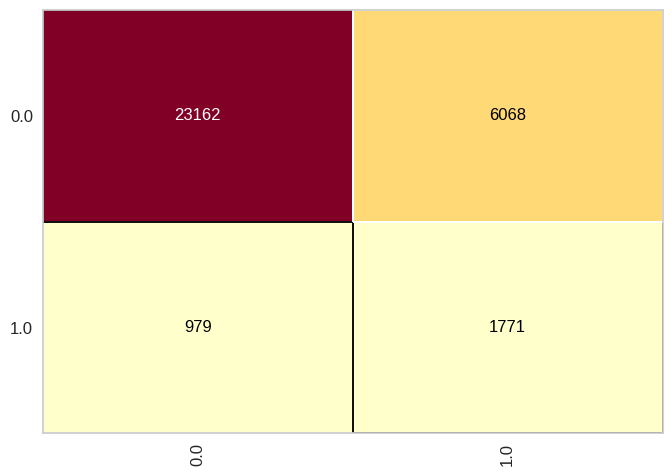

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(hd_data)
cm.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)
cm.score(x_hd_teste, y_hd_teste)

In [ ]:
from sklearn.metrics import *
report = classification_report(y_hd_teste, previsoes)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     29230
         1.0       0.23      0.64      0.33      2750

    accuracy                           0.78     31980
   macro avg       0.59      0.72      0.60     31980
weighted avg       0.90      0.78      0.82     31980



## RandomForestClassifier

In [264]:
from sklearn.ensemble import RandomForestClassifier

In [265]:
random_forest_hd = RandomForestClassifier(n_estimators = 15, class_weight = 'balanced', max_features = 2, criterion = 'entropy', random_state = 0)
random_forest_hd.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=2, n_estimators=15, random_state=0)

In [266]:
previsoes = random_forest_hd.predict(x_hd_teste)
previsoes

array([1., 0., 0., ..., 1., 1., 1.])

In [267]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_hd_teste, previsoes)

0.7096310193871169

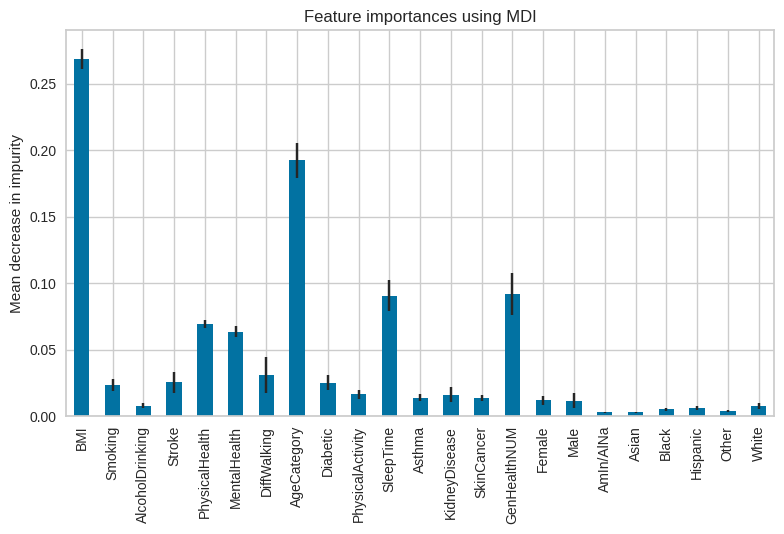

In [268]:
df3 = df2.drop(df2[['HeartDisease']], axis = 1)
importances = random_forest_hd.feature_importances_
feature_names = [i for i in df3]
std = np.std([tree.feature_importances_ for tree in random_forest_hd.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

0.7096310193871169

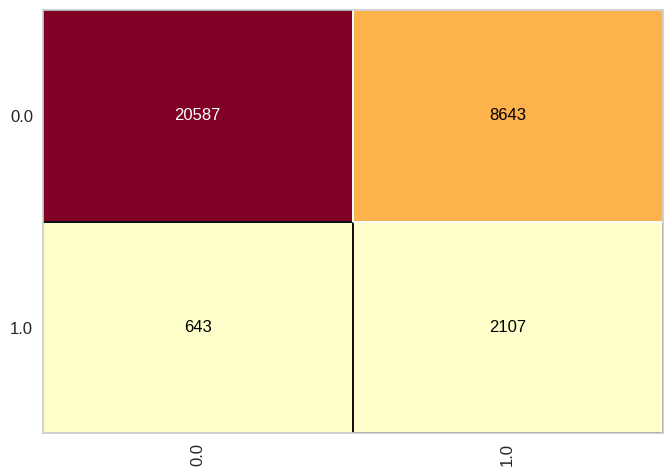

In [269]:
cm = ConfusionMatrix(random_forest_hd)
cm.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)
cm.score(x_hd_teste, y_hd_teste)

In [270]:
from sklearn.metrics import *
report = classification_report(y_hd_teste, previsoes)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.70      0.82     29230
         1.0       0.20      0.77      0.31      2750

    accuracy                           0.71     31980
   macro avg       0.58      0.74      0.56     31980
weighted avg       0.90      0.71      0.77     31980



## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_hd = KNeighborsClassifier(n_neighbors = 10)
knn_hd.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
previsoes = knn_hd.predict(x_hd_teste)
previsoes

array([1., 0., 0., ..., 0., 1., 1.])

In [ ]:
accuracy_score(y_hd_teste, previsoes)

0.750750469043152

0.750750469043152

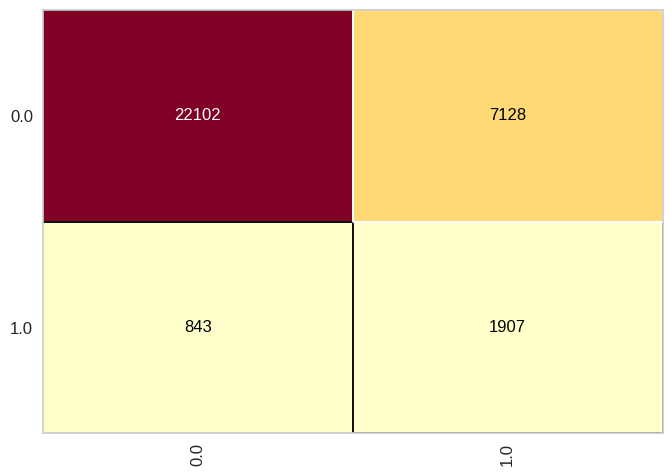

In [ ]:
cm = ConfusionMatrix(knn_hd)
cm.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)
cm.score(x_hd_teste, y_hd_teste)

In [ ]:
from sklearn.metrics import *
report = classification_report(y_hd_teste, previsoes)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85     29230
         1.0       0.21      0.69      0.32      2750

    accuracy                           0.75     31980
   macro avg       0.59      0.72      0.59     31980
weighted avg       0.90      0.75      0.80     31980



## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_model =  GradientBoostingClassifier()
gbc_model.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)

GradientBoostingClassifier()

In [ ]:
previsoes = gbc_model.predict(x_hd_teste)

In [ ]:
accuracy_score(y_hd_teste, previsoes)

0.7322388993120701

0.7322388993120701

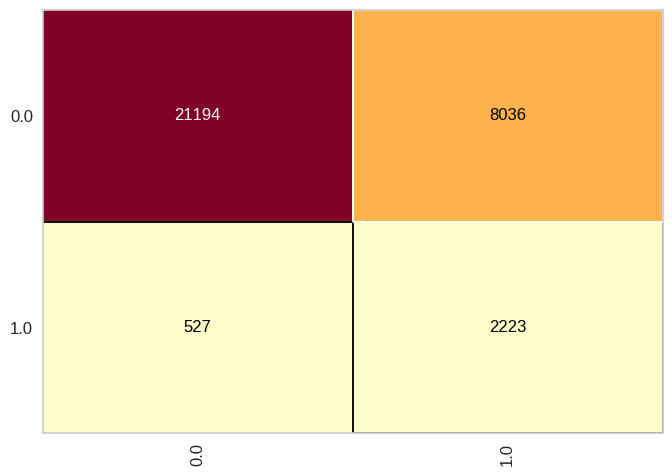

In [ ]:
cm = ConfusionMatrix(gbc_model)
cm.fit(x_hd_treinamento_undersampled, y_hd_treinamento_undersampled)
cm.score(x_hd_teste, y_hd_teste)

In [ ]:
from sklearn.metrics import *
report = classification_report(y_hd_teste, previsoes)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     29230
         1.0       0.22      0.81      0.34      2750

    accuracy                           0.73     31980
   macro avg       0.60      0.77      0.59     31980
weighted avg       0.91      0.73      0.79     31980



# Conclusão

## - O uso do undersampler fez com que a taxa de acerto para a classe 1 aumentasse e a classe 0 diminuísse. Isso fez com que ocorresse um maior equilíbrio entre as classes, já que antes os algorítmos demonstravam um baixo desempenho em classificar os doentes cardíacos. Por fim, é possível analisar que o balanceamento fez com que o modelo criasse uma maior sensibilidade para a classe 1, o que é um avanço, mas também fez com que ocorressem mais falsos positivos.
## - Gostei mais do desempenho do GradientBoostingClassifier, pois foi o que melhor classificou os doentes/classe 1 mesmo apresentando uma quantidade relativamente alta de falsos positivos, demonstrando ser mais sensível para a classe 1.
